In [252]:
!pwd

/home/karen/Documents/GitHub/MirKatAI/evaluation


# Analysis of the evaluation

file answer_registry_16.json contains the answer_registry of the evalaution of the sql_node form the Agent mirkatAI. Every entry is a question, and for each question has the values ['Response Time', 'Correct', 'Expected', 'Answers', 'Question_n']

Here we will go with them, see the average response time for each question, the percentage of correct answers, correct some wrongly marked answers and see if the order of the question afected the time.


In [253]:
import pandas as pd
import json
import time




In [254]:
path_answers = '/home/karen/Documents/GitHub/MirKatAI/evaluation/results/answer_registry_16.json'
with open(path_answers, 'r') as f:
    answer_registry = json.load(f)
answer_registry.keys()

dict_keys(['How many unique seed sequences are associated with human miRNAs?', 'How many mirnas that target STUM ( including its reference sequences ) are also expressed in muscle with a organ_TSI > 0.5', "How many interactions are experimentally validated (source is 'miRTarBase')?", 'How many mirnas that target FEZ2 ( including its reference sequences) are also expressed in muscle with a organ_TSI > 0.5', "What is the probability for the predicted interaction between 'hsa-miR-22-3p' and the gene 'SIRT1' including its reference sequences (refseq)?", "How many gene-miRNA interactions are recorded that originate from the database 'miRDB'?", "In which tissue is the miRNA 'hsa-miR-143-3p' most highly expressed\xa0", 'Which species from the database is marked with two or more organisms', "How many unique miRNAs target the gene 'GRM5'  including its reference sequences ?", 'How many unique mature microRNAs are in the database?', "How many miRNA target interactions are recorded for the miRNA 

In [255]:
path_sql_direct = '/home/karen/Documents/GitHub/MirKatAI/evaluation/results/answer_registry_sql_5.json'
with open(path_sql_direct, 'r') as f:
    answer_registry_sql = json.load(f)


In [256]:
# convert the answer_registry to a dataframe
answer_registry_df = pd.DataFrame.from_dict(answer_registry, orient='index')
answer_registry_df.reset_index(inplace=True)
answer_registry_df.rename(columns={'index': 'Question'}, inplace=True)
answer_registry_df.head()

,Question,Response Time,Correct,Expected,Answers,Question_n
0,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[False, False, False, False, False, False, Fal...",699,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]"
1,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[False, False, False, False, False, False, Fal...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]"
2,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]"
3,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]"
4,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]"


In [257]:
sql_registry_df = pd.DataFrame.from_dict(answer_registry_sql, orient='index')
sql_registry_df.reset_index(inplace=True)
sql_registry_df.rename(columns={'index': 'Question'}, inplace=True)
sql_registry_df.head()


,Question,Response Time
0,How many unique mature microRNAs are in the da...,"[0.193613, 0.138907, 0.116575, 0.180075, 0.124..."
1,Which species from the database is marked with...,"[0.110198, 0.112398, 0.105517, 0.126166, 0.182..."
2,How many miRNA target interactions are recorde...,"[0.123768, 0.131676, 0.110585, 0.100078, 0.135..."
3,What is the seed sequence for 'hsa-miR-9-5p'?,"[0.154137, 0.105322, 0.119718, 0.139512, 0.115..."
4,How many interactions are experimentally valid...,"[6.333854, 6.232022, 6.367434, 6.180829, 6.317..."


In [258]:
# get the mean of the response_time (each value is a list of times)
answer_registry_df['mean_response_time'] = answer_registry_df['Response Time'].apply(lambda x: sum(x) / len(x) if x else 0)
answer_registry_df.head()

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time
0,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[False, False, False, False, False, False, Fal...",699,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421
1,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[False, False, False, False, False, False, Fal...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997
2,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898
3,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448
4,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468


In [259]:
sql_registry_df['mean_response_time'] = sql_registry_df['Response Time'].apply(lambda x: sum(x) / len(x) if x else 0)
sql_registry_df

,Question,Response Time,mean_response_time
0,How many unique mature microRNAs are in the da...,"[0.193613, 0.138907, 0.116575, 0.180075, 0.124...",0.145158
1,Which species from the database is marked with...,"[0.110198, 0.112398, 0.105517, 0.126166, 0.182...",0.124818
2,How many miRNA target interactions are recorde...,"[0.123768, 0.131676, 0.110585, 0.100078, 0.135...",0.115846
3,What is the seed sequence for 'hsa-miR-9-5p'?,"[0.154137, 0.105322, 0.119718, 0.139512, 0.115...",0.120040
4,How many interactions are experimentally valid...,"[6.333854, 6.232022, 6.367434, 6.180829, 6.317...",6.260472
5,What is the probability for the predicted inte...,"[0.162847, 0.128262, 0.167357, 0.132899, 0.122...",0.148649
6,How many unique miRNAs target the gene 'GRM5' ...,"[9.40895, 9.505951, 9.402489, 9.277734, 9.3438...",9.335622
7,How many unique miRNAs target the gene 'FEZ2' ...,"[9.256506, 9.346912, 9.287595, 9.244121, 9.430...",9.332284
8,How many unique miRNAs target the gene 'STUM' ...,"[9.257106, 9.438501, 9.292724, 9.383422, 9.275...",9.322024
9,How many mirnas that target FEZ2 ( including i...,"[0.497866, 0.451036, 0.4494, 0.620788, 0.46625...",0.489222


In [260]:
total_time_sql = sql_registry_df['mean_response_time'].sum()*10
total_time_sql/60

np.float64(9.574386716666668)

In [261]:
# correct question How many unique seed sequences are associated with human miRNAs? with the answer 2027. if the answer contains 2027, mark it as correct
answers_from_question = answer_registry_df[answer_registry_df['Question'] == 'How many unique seed sequences are associated with human miRNAs?']
all_answers = answers_from_question['Answers'].values[0]
# for each answer in all_answers, check if it contains 2027, for each answer, replace the corresponding value in the Correct column with True if it contains 2027, otherwise False
corrected_values = [True if '2027' in str(answer) else False for answer in all_answers]
# convert column type of Correct to list
answers_from_question.at[0,'Correct'] = corrected_values



def fix_answer(registry, question, correct_answer):
    answers_from_question = registry[registry['Question'] == question]
    all_answers = answers_from_question['Answers'].values[0]
    # for each answer in all_answers, check if it contains correct_answer, for each answer, replace the corresponding value in the Correct column with True if it contains correct_answer, otherwise False
    corrected_values = [True if str(correct_answer) in str(answer) else False for answer in all_answers]
    # convert column type of Correct to list
    answers_from_question.at[0,'Correct'] = corrected_values
    answers_from_question['Expected'] = correct_answer
    return answers_from_question.iloc[0]
def add_posible_answers(registry, question, possible_answer):
    """ If the answer cointains the Expected answer or the possible_answer, mark it as correct"""
    answers_from_question = registry[registry['Question'] == question]
    all_answers = answers_from_question['Answers'].values[0]
    expected_answer = answers_from_question['Expected'].values[0]

    # for each answer in all_answers, check if it contains correct_answer or possible_answer, for each answer, replace the corresponding value in the Correct column with True if it contains correct_answer or possible_answer, otherwise False
    corrected_values = [True if str(expected_answer) in str(answer) or str(possible_answer) in str(answer) else False for answer in all_answers]
    # convert column type of Correct to list
    answers_from_question = answers_from_question.iloc[0]
    answers_from_question['Correct'] = corrected_values
    return answers_from_question.copy()
def update_row_in_registry(registry, updated_row):
    question = updated_row['Question']
    index = registry[registry['Question'] == question].index
    if not index.empty:
        registry.iloc[index[0]] = updated_row
    return registry

In [262]:
new_answer = fix_answer(answer_registry_df, 'How many unique seed sequences are associated with human miRNAs?', 2027)
answer_registry_df = update_row_in_registry(answer_registry_df, new_answer)
# The answer is 6831595, but it is written with comma, so we add it as a possible answer
new_answer = add_posible_answers(answer_registry_df, "How many gene-miRNA interactions are recorded that originate from the database 'miRDB'?", '6,831,595')
# mirtarbase scores (probabilities) is makered as 0 instead of 1, so we add it as a possible answer becasue it can mean both things
answer_registry_df = update_row_in_registry(answer_registry_df, new_answer)
new_answer = add_posible_answers(answer_registry_df, "What is the minimum interaction score recorded for any miRNA targeting the gene 'VEGFA'  including its reference sequences ?", '0')
answer_registry_df = update_row_in_registry(answer_registry_df, new_answer)
# If for muscle they take sorgan = msucle, then the answer is 4, if they do system muscoloskeletal, the answer is 2.
new_answer = add_posible_answers(answer_registry_df, "How many mirnas that target FEZ2 ( including its reference sequences) are also expressed in muscle with a organ_TSI > 0.5", '4')
answer_registry_df = update_row_in_registry(answer_registry_df, new_answer)
new_answer = add_posible_answers(answer_registry_df, "How many mirnas that target STUM ( including its reference sequences ) are also expressed in muscle with a organ_TSI > 0.5", 2)
answer_registry_df = update_row_in_registry(answer_registry_df, new_answer)

/tmp/ipykernel_269253/328743144.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answers_from_question['Expected'] = correct_answer


In [263]:
answer_registry_df

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time
0,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421
1,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[True, True, True, True, True, True, True, Tru...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997
2,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898
3,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448
4,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468
5,How many gene-miRNA interactions are recorded ...,"[9.304938, 9.14109, 9.706096, 9.449161, 9.4503...","[True, True, True, True, True, True, True, Tru...",6831595,"[There are 6,831,595 gene-miRNA interactions r...","[6, 14, 10, 5, 7, 7, 3, 10, 10, 7]",9.381289
6,In which tissue is the miRNA 'hsa-miR-143-3p' ...,"[3.548797, 1.429438, 3.691748, 3.8167, 1.56319...","[True, False, True, True, False, False, True, ...",bladder,[The miRNA 'hsa-miR-143-3p' is most highly exp...,"[7, 9, 14, 14, 8, 5, 13, 12, 11, 13]",3.115892
7,Which species from the database is marked with...,"[0.640708, 0.641589, 0.751646, 0.641318, 0.638...","[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"[I am sorry, I cannot fulfill this request. Th...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848
8,How many unique miRNAs target the gene 'GRM5' ...,"[12.112808, 11.904832, 12.162632, 11.802798, 1...","[False, False, False, False, False, False, Fal...",307,[There are 97 unique miRNAs that target the ge...,"[9, 16, 11, 2, 14, 16, 6, 1, 14, 11]",11.981831
9,How many unique mature microRNAs are in the da...,"[1.45966, 1.295917, 1.46018, 1.295198, 1.41435...","[True, True, True, True, True, True, True, Tru...",49155,[There are 49155 unique mature microRNAs in th...,"[10, 7, 6, 7, 16, 12, 12, 7, 12, 10]",1.365492


In [264]:
# get the percentage of correct answers
answer_registry_df['percentage_correct'] = answer_registry_df['Correct'].apply(lambda x: sum(x) / len(x) if x else 0)
# get the total number of answers
answer_registry_df['total_answers'] = answer_registry_df['Answers'].apply(lambda x: len(x) if x else 0)
# get the total number of correct answers
answer_registry_df['total_correct'] = answer_registry_df['Correct'].apply(lambda x: sum(x) if x else 0)
# sort by percentage_correct
answer_registry_df = answer_registry_df.sort_values(by='percentage_correct', ascending=False)
answer_registry_df.head(20)

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct
0,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10
1,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[True, True, True, True, True, True, True, Tru...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997,1.0,10,10
2,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898,1.0,10,10
3,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448,1.0,10,10
4,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468,1.0,10,10
5,How many gene-miRNA interactions are recorded ...,"[9.304938, 9.14109, 9.706096, 9.449161, 9.4503...","[True, True, True, True, True, True, True, Tru...",6831595,"[There are 6,831,595 gene-miRNA interactions r...","[6, 14, 10, 5, 7, 7, 3, 10, 10, 7]",9.381289,1.0,10,10
10,How many miRNA target interactions are recorde...,"[1.4618229999999999, 1.866028, 1.667227, 1.780...","[True, True, True, True, True, True, True, Tru...",1492,[There are 1492 miRNA target interactions reco...,"[11, 2, 5, 9, 3, 3, 7, 13, 3, 2]",1.628819,1.0,10,10
9,How many unique mature microRNAs are in the da...,"[1.45966, 1.295917, 1.46018, 1.295198, 1.41435...","[True, True, True, True, True, True, True, Tru...",49155,[There are 49155 unique mature microRNAs in th...,"[10, 7, 6, 7, 16, 12, 12, 7, 12, 10]",1.365492,1.0,10,10
14,What is the minimum interaction score recorded...,"[13.162436, 13.005422, 13.240328, 13.018915, 1...","[True, True, True, True, True, True, True, Tru...",50,[The minimum probability recorded for any miRN...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10
12,How many unique miRNAs target the gene 'FEZ2' ...,"[11.756529, 12.007373, 11.955086, 11.874108, 1...","[True, True, True, True, True, True, True, Tru...",75,[There are 75 unique miRNAs that target the ge...,"[13, 5, 16, 3, 1, 1, 14, 15, 6, 1]",11.929250,1.0,10,10


In [265]:
# add difficulty column based on file difficulty_registry.csv

Responses 8 to 11 made a single run, the order they apear in the dictionary is the order they were called. There is suspicion that the further the question is from the start, the longer it takes.

In [266]:
sequential_registrys = {}

for n in range(8, 12):
    path_answers_sequential = f'/home/karen/Documents/GitHub/MirKatAI/evaluation/results/answer_registry_{n}.json'
    with open(path_answers_sequential, 'r') as f:
        answer_registry_sequential = json.load(f)
    i = 0
    for key in answer_registry_sequential.keys():
        i += 1
        if key not in sequential_registrys:
            sequential_registrys[key] = [{'Response Time': [answer_registry_sequential[key]['Response Time'][0]], 'Question_n': i}]
        else:
            sequential_registrys[key].append({'Response Time': [answer_registry_sequential[key]['Response Time'][0]], 'Question_n': i})
sequential_registrys

{'How many unique seed sequences are associated with human miRNAs?': [{'Response Time': [2.323233],
   'Question_n': 1},
  {'Response Time': [2.503335], 'Question_n': 5},
  {'Response Time': [2.40012], 'Question_n': 2},
  {'Response Time': [11.570173], 'Question_n': 11}],
 "How many unique miRNAs target the gene 'GRM5'?": [{'Response Time': [1.9243320000000002],
   'Question_n': 2},
  {'Response Time': [1.868786], 'Question_n': 2},
  {'Response Time': [2.936443], 'Question_n': 7},
  {'Response Time': [3.539968], 'Question_n': 9}],
 'Which species from the database is marked with two or more organisms': [{'Response Time': [0.800461],
   'Question_n': 3},
  {'Response Time': [57.570709], 'Question_n': 12},
  {'Response Time': [44.497614], 'Question_n': 15},
  {'Response Time': [1.172861], 'Question_n': 6}],
 "How many unique miRNAs target the gene 'FEZ2'?": [{'Response Time': [1.898628],
   'Question_n': 4},
  {'Response Time': [595.035989], 'Question_n': 13},
  {'Response Time': [12.048

## Time taken per question

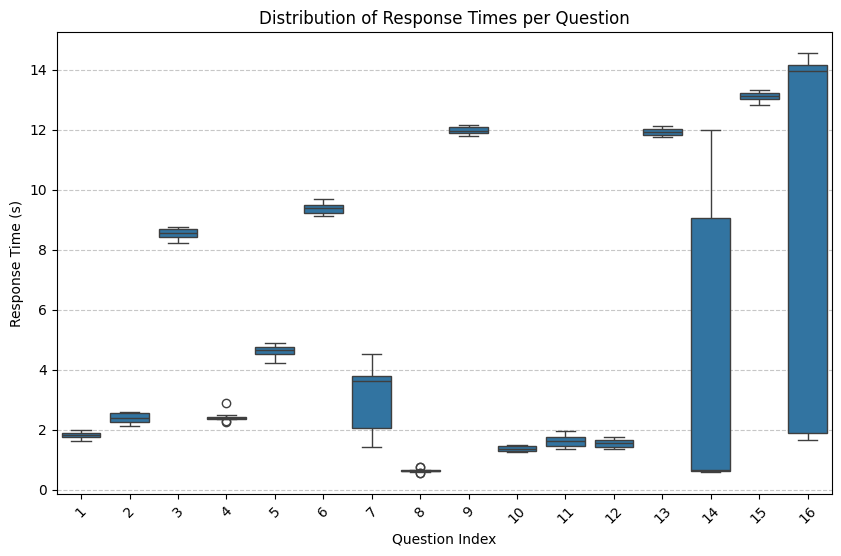

In [267]:
# Make a box plot with all the questions, order by the fastes to the slowest answer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_exploded = answer_registry_df.explode('Response Time')

# Ensure the column is numeric
df_exploded['Response Time'] = pd.to_numeric(df_exploded['Response Time'])
df_exploded['Question Index'] = df_exploded.index + 1 
df_exploded.sort_values(by='mean_response_time', inplace=True)

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Question Index', y='Response Time', data=df_exploded)
plt.xticks(rotation=45)
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Distribution of Response Times per Question')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

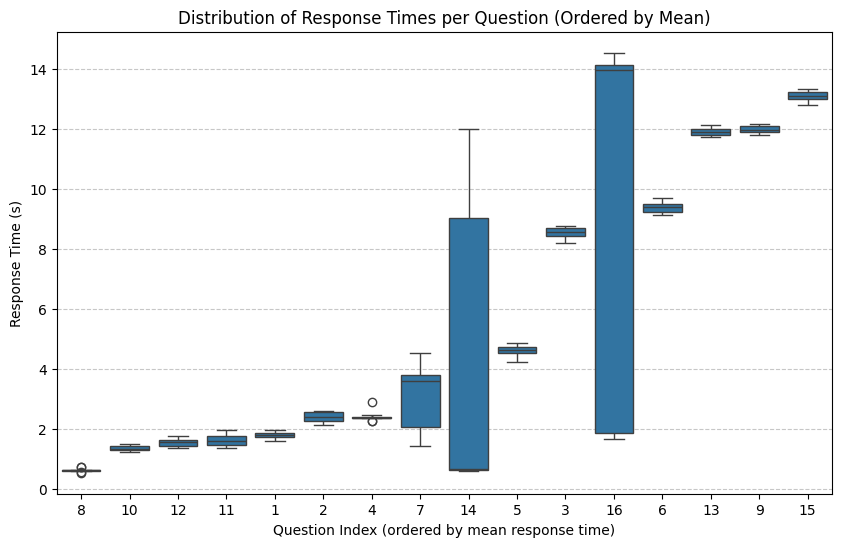

In [268]:

# Explode the lists into individual rows
df_exploded = answer_registry_df.explode('Response Time')

# Ensure numeric
df_exploded['Response Time'] = pd.to_numeric(df_exploded['Response Time'])

# Create a simple question index
df_exploded['Question Index'] = df_exploded.index + 1 

# Compute mean response time per question
mean_times = df_exploded.groupby('Question Index')['Response Time'].mean().sort_values()



# Create an ordered category for plotting
df_exploded['Question Index'] = pd.Categorical(df_exploded['Question Index'],
                                               categories=mean_times.index,
                                               ordered=True)

# Boxplot ordered by mean response time
plt.figure(figsize=(10,6))
sns.boxplot(x='Question Index', y='Response Time', data=df_exploded)
plt.xlabel('Question Index (ordered by mean response time)')
plt.ylabel('Response Time (s)')
plt.title('Distribution of Response Times per Question (Ordered by Mean)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [269]:
df_exploded

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct,Question Index
0,How many unique seed sequences are associated ...,1.741426,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,1
0,How many unique seed sequences are associated ...,1.882210,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,1
0,How many unique seed sequences are associated ...,1.975990,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,1
0,How many unique seed sequences are associated ...,1.884129,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,1
0,How many unique seed sequences are associated ...,1.769055,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...
15,How many gene-miRNA interactions are recorded ...,1.876475,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,16
15,How many gene-miRNA interactions are recorded ...,1.886972,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,16
15,How many gene-miRNA interactions are recorded ...,13.921140,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,16
15,How many gene-miRNA interactions are recorded ...,1.662138,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,16


/tmp/ipykernel_269253/2636248277.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_exploded.groupby('Question Index')['Response Time'].median()


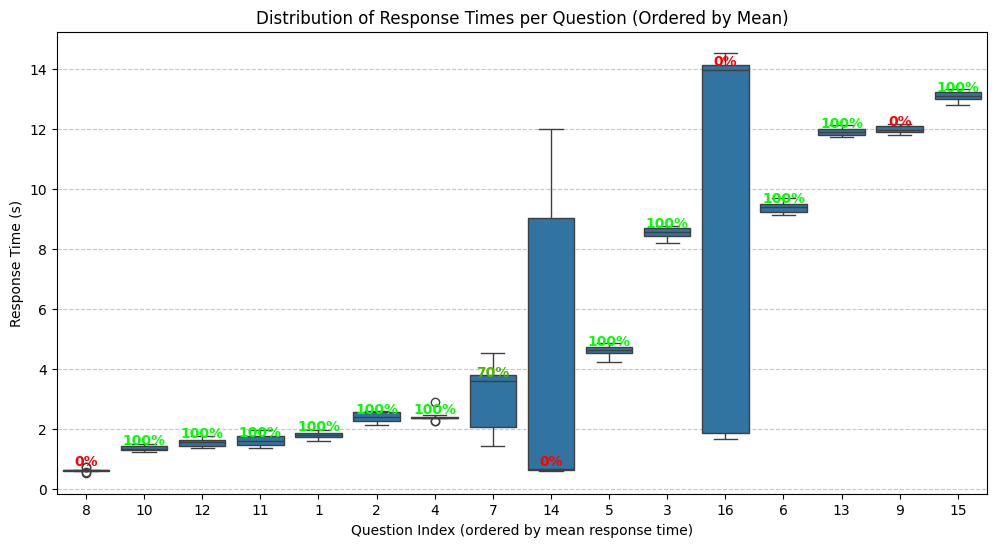

In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the lists into individual rows
df_exploded = answer_registry_df.explode('Response Time')
df_exploded['Response Time'] = pd.to_numeric(df_exploded['Response Time'])

# Assign simple question index
df_exploded['Question Index'] = df_exploded.index + 1

# Compute mean response time per question for ordering
mean_times = df_exploded.groupby('Question Index')['Response Time'].mean().sort_values()
df_exploded['Question Index'] = pd.Categorical(df_exploded['Question Index'],
                                               categories=mean_times.index,
                                               ordered=True)

# Create the boxplot
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Question Index', y='Response Time', data=df_exploded)

# Add percentage labels above each box
# Get the median y-value for each box (to position the label slightly above)
medians = df_exploded.groupby('Question Index')['Response Time'].median()

for i, q_idx in enumerate(mean_times.index):
    pct = answer_registry_df.loc[q_idx-1, 'percentage_correct'] * 100  # scale 0-100
    # Determine color: green for 100, red for 0, interpolate
    color = (1-pct/100, pct/100, 0)  # RGB (red->green)
    ax.text(i, medians[q_idx] + 0.05, f'{pct:.0f}%', ha='center', va='bottom', color=color, fontweight='bold')

plt.xlabel('Question Index (ordered by mean response time)')
plt.ylabel('Response Time (s)')
plt.title('Distribution of Response Times per Question (Ordered by Mean)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_269253/3892149541.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_exploded.groupby('Question Index')['Response Time'].median()


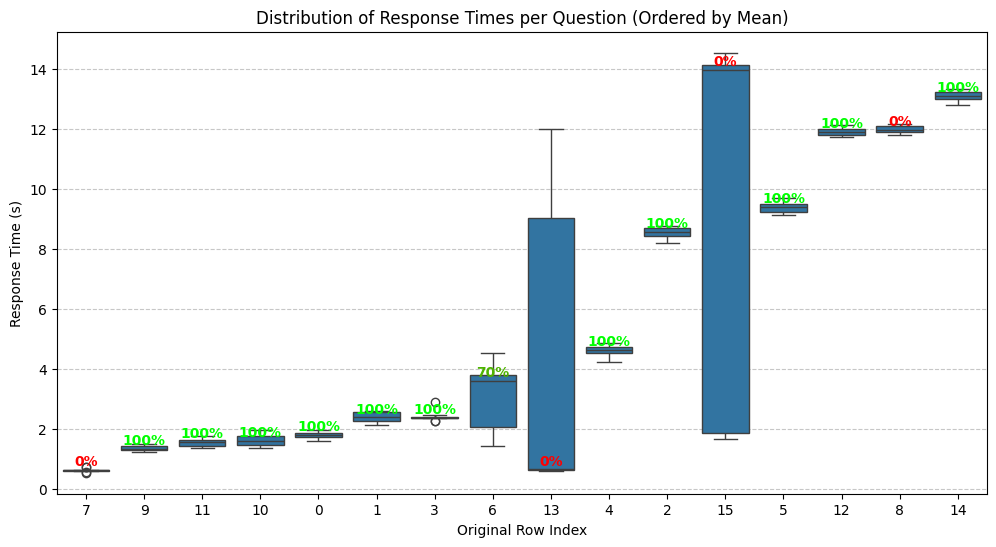

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the lists into individual rows
df_exploded = answer_registry_df.explode('Response Time')
df_exploded['Response Time'] = pd.to_numeric(df_exploded['Response Time'])

# Use the original row index as Question Index for plotting
df_exploded['Question Index'] = df_exploded.index  # original row index

# Compute mean response time per question (for ordering)
mean_times = df_exploded.groupby('Question Index')['Response Time'].mean().sort_values()

# Make Question Index a categorical ordered by mean response time
df_exploded['Question Index'] = pd.Categorical(df_exploded['Question Index'],
                                               categories=mean_times.index,
                                               ordered=True)

# Create the boxplot
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Question Index', y='Response Time', data=df_exploded)

# Add percentage labels above each box
medians = df_exploded.groupby('Question Index')['Response Time'].median()
for i, q_idx in enumerate(mean_times.index):
    pct = answer_registry_df.loc[q_idx, 'percentage_correct'] * 100  # scale 0-100
    color = (1-pct/100, pct/100, 0)  # red->green
    ax.text(i, medians[q_idx] + 0.05, f'{pct:.0f}%', ha='center', va='bottom', color=color, fontweight='bold')

plt.xlabel('Original Row Index')
plt.ylabel('Response Time (s)')
plt.title('Distribution of Response Times per Question (Ordered by Mean)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [272]:
df_exploded

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct,Question Index
0,How many unique seed sequences are associated ...,1.741426,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0
0,How many unique seed sequences are associated ...,1.882210,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0
0,How many unique seed sequences are associated ...,1.975990,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0
0,How many unique seed sequences are associated ...,1.884129,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0
0,How many unique seed sequences are associated ...,1.769055,"[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...
15,How many gene-miRNA interactions are recorded ...,1.876475,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,15
15,How many gene-miRNA interactions are recorded ...,1.886972,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,15
15,How many gene-miRNA interactions are recorded ...,13.921140,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,15
15,How many gene-miRNA interactions are recorded ...,1.662138,"[False, False, False, False, False, False, Fal...",17352,[There are 147959 unique genes with miRNA inte...,"[16, 13, 15, 16, 11, 13, 10, 8, 9, 9]",9.236449,0.0,10,0,15


In [313]:
combined_sql_mirkat = pd.merge(answer_registry_df, sql_registry_df, on='Question', suffixes=('_mirkat', '_sql'))
combined_sql_mirkat[['Question', 'mean_response_time_mirkat', 'mean_response_time_sql']].sort_values(by='Question')['Question'].values

array(["How many gene-miRNA interactions are recorded that originate from the database 'miRDB' from unique gene symbols?",
       "How many gene-miRNA interactions are recorded that originate from the database 'miRDB'?",
       "How many interactions are experimentally validated (source is 'miRTarBase')?",
       "How many miRNA target interactions are recorded for the miRNA 'hsa-miR-143-3p'?",
       'How many mirnas that target FEZ2 ( including its reference sequences) are also expressed in muscle with a organ_TSI > 0.5',
       'How many mirnas that target STUM ( including its reference sequences ) are also expressed in muscle with a organ_TSI > 0.5',
       'How many unique mature microRNAs are in the database?',
       "How many unique miRNAs target the gene 'FEZ2'  including its reference sequences ?",
       "How many unique miRNAs target the gene 'GRM5'  including its reference sequences ?",
       "How many unique miRNAs target the gene 'STUM'  including its reference sequence

In [314]:
# get the rows where the mean sql time is greater than the mean mirkat time
combined_sql_mirkat = combined_sql_mirkat.sort_values(by='mean_response_time_mirkat', ascending=True).reset_index(drop=True)

In [319]:
combined_sql_mirkat[['Question',  'mean_response_time_mirkat', 'mean_response_time_sql', 'Expected', 'percentage_correct']]
# add difficulty column based on file difficulty_registry.csv
difficulty_file = f'/home/karen/Documents/GitHub/MirKatAI/evaluation/data/dificulty.tsv'
difficulty_df = pd.read_csv(difficulty_file, sep='\t', index_col=0)
difficulty_df.index = difficulty_df['Question']
difficulty_df.drop(columns=['Question'], inplace=True)

combined_sql_mirkat = pd.concat([combined_sql_mirkat.set_index('Question'), difficulty_df], axis=1, join='inner').reset_index()
combined_sql_mirkat[['Question',  'mean_response_time_mirkat', 'mean_response_time_sql', 'Expected', 'percentage_correct', 'Dificulty']]

,Question,mean_response_time_mirkat,mean_response_time_sql,Expected,percentage_correct,Dificulty
0,Which species from the database is marked with...,0.641848,0.124818,Merkel cell polyomavirus,0.0,2
1,How many unique mature microRNAs are in the da...,1.365492,0.145158,49155,1.0,1
2,What is the seed sequence for 'hsa-miR-9-5p'?,1.554757,0.120040,CUUUGGU,1.0,1
3,How many miRNA target interactions are recorde...,1.628819,0.115846,1492,1.0,1
4,How many unique seed sequences are associated ...,1.799421,0.178146,2027,1.0,2
5,How many mirnas that target STUM ( including i...,2.392997,0.468267,4,1.0,2
6,How many mirnas that target FEZ2 ( including i...,2.427448,0.489222,2,1.0,2
7,How many unique miRNAs target the gene 'STUM' ...,4.031571,9.322024,278,0.0,1
8,What is the probability for the predicted inte...,4.612468,0.148649,0,1.0,1
9,How many interactions are experimentally valid...,8.550898,6.260472,7694,1.0,1


/tmp/ipykernel_269253/2671657695.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_long[df_long['Source']=='MirKatAI'].groupby('index')['Response Time'].median()


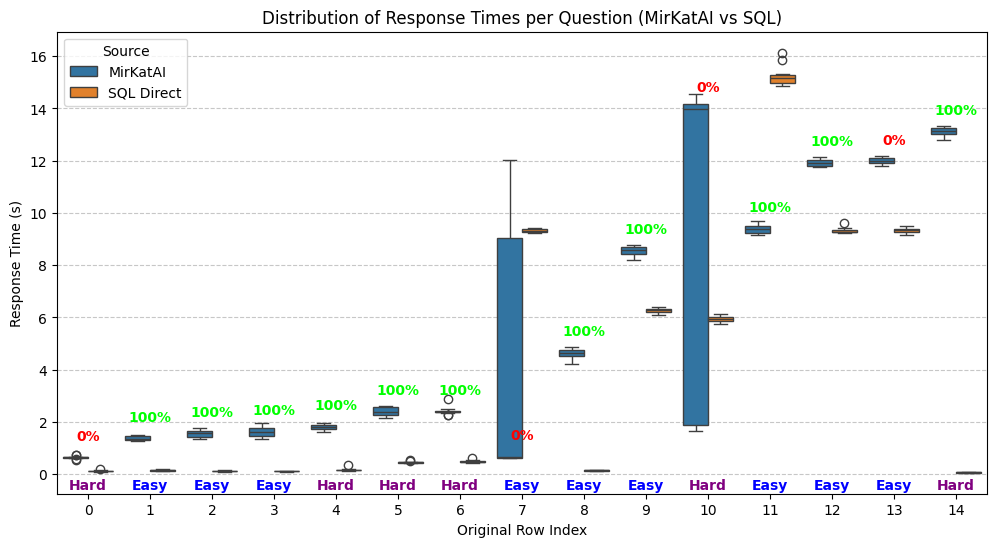

In [443]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the response times for both sources
df_mirkat = combined_sql_mirkat[['Response Time_mirkat', 'percentage_correct']].copy()
df_sql = combined_sql_mirkat[['Response Time_sql']].copy()

df_mirkat = df_mirkat.explode('Response Time_mirkat')
df_sql = df_sql.explode('Response Time_sql')

# Convert to numeric
df_mirkat['Response Time_mirkat'] = pd.to_numeric(df_mirkat['Response Time_mirkat'])
df_sql['Response Time_sql'] = pd.to_numeric(df_sql['Response Time_sql'])

# Add question index
df_mirkat['index'] = df_mirkat.index
df_sql['index'] = df_sql.index

# Add source column
df_mirkat['Source'] = 'MirKatAI'
df_sql['Source'] = 'SQL Direct'

# Combine
df_long = pd.concat([
    df_mirkat.rename(columns={'Response Time_mirkat':'Response Time'}),
    df_sql.rename(columns={'Response Time_sql':'Response Time', 'index':'index'})
])

# Add percentage_correct for MirKatAI (for labeling)
df_long = df_long.merge(combined_sql_mirkat[['percentage_correct']], left_on='index', right_index=True, how='left')

# Order questions by MirKatAI mean response time
mean_times = df_long[df_long['Source']=='MirKatAI'].groupby('index')['Response Time'].mean().sort_values()
ordered_categories = mean_times.index
df_long['index'] = pd.Categorical(df_long['index'], categories=ordered_categories, ordered=True)

# Boxplot
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='index', y='Response Time', hue='Source', data=df_long)

# Add percentage_correct labels above MirKatAI boxes
medians = df_long[df_long['Source']=='MirKatAI'].groupby('index')['Response Time'].median()
for i, q_idx in enumerate(ordered_categories):
    pct = combined_sql_mirkat.loc[q_idx, 'percentage_correct'] * 100
    color = (1-pct/100, pct/100, 0)  # red->green
    ax.text(i, medians[q_idx] + 0.55, f'{pct:.0f}%', ha='center', va='bottom', color=color, fontweight='bold')

difficulty_colors = {'Easy': 'blue', 'Hard': 'purple', 'Very Hard': 'black', None: 'gray'}
# Add difficulty labels above MirKatAI boxes
for i, q_idx in enumerate(ordered_categories):
    mapping_difficulty = {'Easy': 1, 'Hard': 2, 'Very Hard': 3}
    diff_val =  'Easy' if combined_sql_mirkat.loc[q_idx, 'Dificulty'] == 1 else 'Hard' if combined_sql_mirkat.loc[q_idx, 'Dificulty'] == 2 else 'Very Hard'
    ax.text(i, -0.7, diff_val, ha='center', va='bottom', color=difficulty_colors[diff_val], fontweight='bold')

plt.xlabel('Original Row Index')
plt.ylabel('Response Time (s)')
plt.title('Distribution of Response Times per Question (MirKatAI vs SQL)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Source')
plt.savefig('results/response_time_comparison.svg', bbox_inches='tight')
plt.show()


In [326]:
combined_sql_mirkat

,Question,Response Time_mirkat,Correct,Expected,Answers,Question_n,mean_response_time_mirkat,percentage_correct,total_answers,total_correct,Response Time_sql,mean_response_time_sql,Unique answer,Dificulty
0,Which species from the database is marked with...,"[0.640708, 0.641589, 0.751646, 0.641318, 0.638...","[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"[I am sorry, I cannot fulfill this request. Th...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,"[0.110198, 0.112398, 0.105517, 0.126166, 0.182...",0.124818,Y,2
1,How many unique mature microRNAs are in the da...,"[1.45966, 1.295917, 1.46018, 1.295198, 1.41435...","[True, True, True, True, True, True, True, Tru...",49155,[There are 49155 unique mature microRNAs in th...,"[10, 7, 6, 7, 16, 12, 12, 7, 12, 10]",1.365492,1.0,10,10,"[0.193613, 0.138907, 0.116575, 0.180075, 0.124...",0.145158,Y,1
2,What is the seed sequence for 'hsa-miR-9-5p'?,"[1.563405, 1.6831450000000001, 1.385196, 1.503...","[True, True, True, True, True, True, True, Tru...",CUUUGGU,[The seed sequence for hsa-miR-9-5p is CUUUGGU...,"[12, 8, 12, 6, 5, 14, 4, 5, 2, 14]",1.554757,1.0,10,10,"[0.154137, 0.105322, 0.119718, 0.139512, 0.115...",0.120040,Y,1
3,How many miRNA target interactions are recorde...,"[1.4618229999999999, 1.866028, 1.667227, 1.780...","[True, True, True, True, True, True, True, Tru...",1492,[There are 1492 miRNA target interactions reco...,"[11, 2, 5, 9, 3, 3, 7, 13, 3, 2]",1.628819,1.0,10,10,"[0.123768, 0.131676, 0.110585, 0.100078, 0.135...",0.115846,Y,1
4,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,"[0.176265, 0.164272, 0.13478, 0.162141, 0.1804...",0.178146,Y,2
5,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[True, True, True, True, True, True, True, Tru...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997,1.0,10,10,"[0.432267, 0.441565, 0.518181, 0.450851, 0.440...",0.468267,Y,2
6,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448,1.0,10,10,"[0.497866, 0.451036, 0.4494, 0.620788, 0.46625...",0.489222,Y,2
7,How many unique miRNAs target the gene 'STUM' ...,"[11.95583, 0.636971, 12.010009, 0.671545, 11.8...","[False, False, False, False, False, False, Fal...",278,[There are 94 unique miRNAs that target the ge...,"[14, 12, 9, 4, 4, 9, 15, 6, 13, 4]",4.031571,0.0,10,0,"[9.257106, 9.438501, 9.292724, 9.383422, 9.275...",9.322024,Y,1
8,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468,1.0,10,10,"[0.162847, 0.128262, 0.167357, 0.132899, 0.122...",0.148649,Y,1
9,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898,1.0,10,10,"[6.333854, 6.232022, 6.367434, 6.180829, 6.317...",6.260472,Y,1


## Difference on excecution time SQL vs miRKAtAI



In [325]:
answer_registry_df

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct
0,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10
1,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[True, True, True, True, True, True, True, Tru...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997,1.0,10,10
2,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898,1.0,10,10
3,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448,1.0,10,10
4,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468,1.0,10,10
5,How many gene-miRNA interactions are recorded ...,"[9.304938, 9.14109, 9.706096, 9.449161, 9.4503...","[True, True, True, True, True, True, True, Tru...",6831595,"[There are 6,831,595 gene-miRNA interactions r...","[6, 14, 10, 5, 7, 7, 3, 10, 10, 7]",9.381289,1.0,10,10
10,How many miRNA target interactions are recorde...,"[1.4618229999999999, 1.866028, 1.667227, 1.780...","[True, True, True, True, True, True, True, Tru...",1492,[There are 1492 miRNA target interactions reco...,"[11, 2, 5, 9, 3, 3, 7, 13, 3, 2]",1.628819,1.0,10,10
9,How many unique mature microRNAs are in the da...,"[1.45966, 1.295917, 1.46018, 1.295198, 1.41435...","[True, True, True, True, True, True, True, Tru...",49155,[There are 49155 unique mature microRNAs in th...,"[10, 7, 6, 7, 16, 12, 12, 7, 12, 10]",1.365492,1.0,10,10
14,What is the minimum interaction score recorded...,"[13.162436, 13.005422, 13.240328, 13.018915, 1...","[True, True, True, True, True, True, True, Tru...",50,[The minimum probability recorded for any miRN...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10
12,How many unique miRNAs target the gene 'FEZ2' ...,"[11.756529, 12.007373, 11.955086, 11.874108, 1...","[True, True, True, True, True, True, True, Tru...",75,[There are 75 unique miRNAs that target the ge...,"[13, 5, 16, 3, 1, 1, 14, 15, 6, 1]",11.929250,1.0,10,10


In [277]:
sql_registry_df
# the row where the question contains "How many mirnas that target FEZ2 ( including its reference sequences) are also expressed in muscle with a organ_TSI > 0.5"
q = "are also expressed in muscle with a organ_TSI > 0.5"
sql_registry_df[sql_registry_df['Question'].str.contains(q)]['Question'].values

array(['How many mirnas that target FEZ2 ( including its reference sequences) are also expressed in muscle with a organ_TSI > 0.5',
       'How many mirnas that target STUM ( including its reference sequences ) are also expressed in muscle with a organ_TSI > 0.5'],
      dtype=object)

In [278]:
from scipy import stats
import numpy as np
import numpy as np
def evaluate_times(mirkat_times, sql_times):
    """This function will do a pair t test to compare the times of the two registrys"""
    assert len(mirkat_times) == len(sql_times), "The two lists must have the same length"
    # Perform a paired t-test
    t_stat, p_value = stats.ttest_rel(mirkat_times, sql_times)

    # Calculate means and standard deviations
    mean_mirkat = np.mean(mirkat_times)
    mean_sql = np.mean(sql_times)
    std_mirkat = np.std(mirkat_times)
    std_sql = np.std(sql_times)
    diff = np.array(mirkat_times) - np.array(sql_times)
    Cohens_d = diff.mean() / diff.std(ddof=1)
    results = {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_mirkat': mean_mirkat,
        'mean_sql': mean_sql,
        'std_mirkat': std_mirkat,
        'std_sql': std_sql,
        'Cohens_d': Cohens_d,
        'mean_difference': mean_mirkat - mean_sql,
        'n': len(mirkat_times)
    }

    return results

In [279]:
sql_registry_df

,Question,Response Time,mean_response_time
0,How many unique mature microRNAs are in the da...,"[0.193613, 0.138907, 0.116575, 0.180075, 0.124...",0.145158
1,Which species from the database is marked with...,"[0.110198, 0.112398, 0.105517, 0.126166, 0.182...",0.124818
2,How many miRNA target interactions are recorde...,"[0.123768, 0.131676, 0.110585, 0.100078, 0.135...",0.115846
3,What is the seed sequence for 'hsa-miR-9-5p'?,"[0.154137, 0.105322, 0.119718, 0.139512, 0.115...",0.120040
4,How many interactions are experimentally valid...,"[6.333854, 6.232022, 6.367434, 6.180829, 6.317...",6.260472
5,What is the probability for the predicted inte...,"[0.162847, 0.128262, 0.167357, 0.132899, 0.122...",0.148649
6,How many unique miRNAs target the gene 'GRM5' ...,"[9.40895, 9.505951, 9.402489, 9.277734, 9.3438...",9.335622
7,How many unique miRNAs target the gene 'FEZ2' ...,"[9.256506, 9.346912, 9.287595, 9.244121, 9.430...",9.332284
8,How many unique miRNAs target the gene 'STUM' ...,"[9.257106, 9.438501, 9.292724, 9.383422, 9.275...",9.322024
9,How many mirnas that target FEZ2 ( including i...,"[0.497866, 0.451036, 0.4494, 0.620788, 0.46625...",0.489222


In [280]:
sql_registry_df
answer_registry_df

differences = []

for question in answer_registry_df['Question']:
    time_mirkat = answer_registry_df[answer_registry_df['Question'] == question].iloc[0]['Response Time']
    if question in sql_registry_df['Question'].values:
        time_sql = sql_registry_df[sql_registry_df['Question'] == question].iloc[0]['Response Time']
        result = evaluate_times(time_mirkat, time_sql)
        print(f"Question: {question}")
        print(f"MirKatAI - Mean: {result['mean_mirkat']:.4f}, Std: {result['std_mirkat']:.4f}")
        print(f"SQL Direct - Mean: {result['mean_sql']:.4f}, Std: {result['std_sql']:.4f}")
        print(f"t-statistic: {result['t_statistic']:.4f}, p-value: {result['p_value']:.4f}")
        print(f"Cohen's d: {result['Cohens_d']:.4f}, Mean Difference: {result['mean_difference']:.4f}")
        dif = {
            'Question': question,
            'mean_mirkat': result['mean_mirkat'],
            'std_mirkat': result['std_mirkat'],
            'mean_sql': result['mean_sql'],
            'std_sql': result['std_sql'],
            't_statistic': result['t_statistic'],
            'p_value': result['p_value'],
            'Cohens_d': result['Cohens_d'],
            'mean_difference': result['mean_difference'],
            'n': result['n']
        }
        differences.append(dif)


    else:
        print(f"Question: {question} not found in SQL Direct results.")
    print("--------------------------------------------------")

Question: How many unique seed sequences are associated with human miRNAs?
MirKatAI - Mean: 1.7994, Std: 0.1088
SQL Direct - Mean: 0.1781, Std: 0.0593
t-statistic: 32.5428, p-value: 0.0000
Cohen's d: 10.2909, Mean Difference: 1.6213
--------------------------------------------------
Question: How many mirnas that target STUM ( including its reference sequences ) are also expressed in muscle with a organ_TSI > 0.5
MirKatAI - Mean: 2.3930, Std: 0.1670
SQL Direct - Mean: 0.4683, Std: 0.0344
t-statistic: 38.4148, p-value: 0.0000
Cohen's d: 12.1478, Mean Difference: 1.9247
--------------------------------------------------
Question: How many interactions are experimentally validated (source is 'miRTarBase')?
MirKatAI - Mean: 8.5509, Std: 0.1684
SQL Direct - Mean: 6.2605, Std: 0.1036
t-statistic: 30.8928, p-value: 0.0000
Cohen's d: 9.7691, Mean Difference: 2.2904
--------------------------------------------------
Question: How many mirnas that target FEZ2 ( including its reference sequences)

On average, MirKatAI was 18.94× slower than SQL Direct (1.82 seconds difference per query).
The largest difference was for the question: 'What is the minimum interaction score recorded for any miRNA targeting the gene 'VEGFA'  including its reference sequences ?' where MirKatAI took 13.12s and SQL Direct took 0.07s (13.05s difference).
The smallest difference was for the question: 'How many gene-miRNA interactions are recorded that originate from the database 'miRDB'?' where MirKatAI took 9.38s and SQL Direct took 15.27s (-5.89s difference).
The smallest positive difference was for the question: 'Which species from the database is marked with two or more organisms' where MirKatAI took 0.64s and SQL Direct took 0.12s (0.52s difference).


/tmp/ipykernel_269253/347951980.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


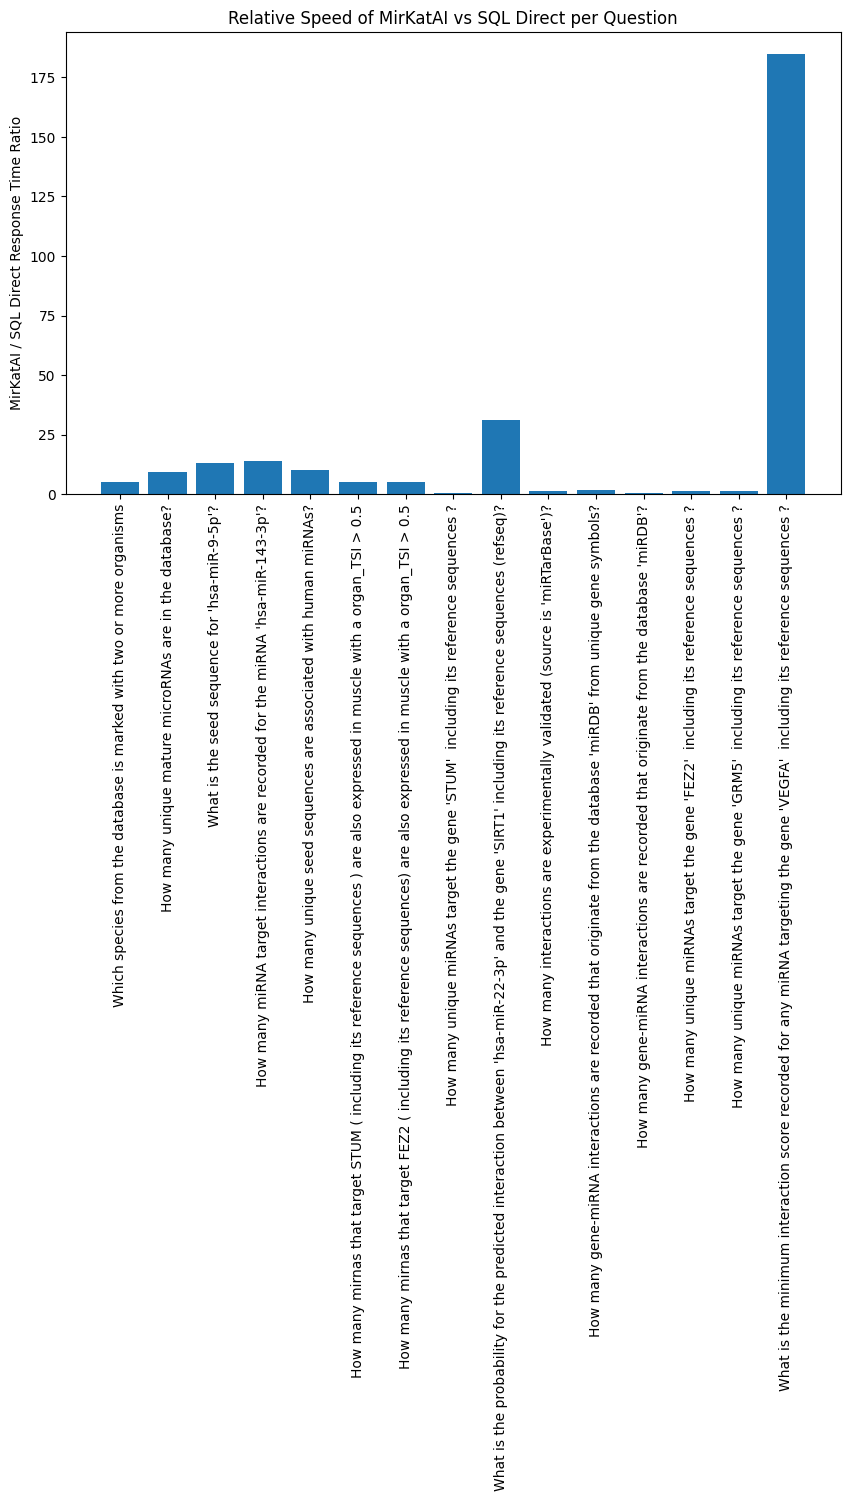

In [335]:
summary_df = combined_sql_mirkat[['Question', 'mean_response_time_mirkat', 'mean_response_time_sql']].copy()
summary_df['ratio_mirkat_sql'] = summary_df['mean_response_time_mirkat'] / summary_df['mean_response_time_sql']
summary_df['difference_mirkat_sql'] = summary_df['mean_response_time_mirkat'] - summary_df['mean_response_time_sql']
avg_ratio = summary_df['ratio_mirkat_sql'].mean()
avg_difference = summary_df['difference_mirkat_sql'].mean()
print(f"On average, MirKatAI was {avg_ratio:.2f}× slower than SQL Direct "
      f"({avg_difference:.2f} seconds difference per query).")

# the max difference
max_diff_row = summary_df.loc[summary_df['difference_mirkat_sql'].idxmax()]
print(f"The largest difference was for the question: '{max_diff_row['Question']}' "
      f"where MirKatAI took {max_diff_row['mean_response_time_mirkat']:.2f}s and SQL Direct took {max_diff_row['mean_response_time_sql']:.2f}s "
      f"({max_diff_row['difference_mirkat_sql']:.2f}s difference).")

# min difference
min_diff_row = summary_df.loc[summary_df['difference_mirkat_sql'].idxmin()]
print(f"The smallest difference was for the question: '{min_diff_row['Question']}' "
      f"where MirKatAI took {min_diff_row['mean_response_time_mirkat']:.2f}s and SQL Direct took {min_diff_row['mean_response_time_sql']:.2f}s "
      f"({min_diff_row['difference_mirkat_sql']:.2f}s difference).")
# smallest positive difference
positive_differences = summary_df[summary_df['difference_mirkat_sql'] > 0]
if not positive_differences.empty:
    smallest_positive_diff_row = positive_differences.loc[positive_differences['difference_mirkat_sql'].idxmin()]
    print(f"The smallest positive difference was for the question: '{smallest_positive_diff_row['Question']}' "
          f"where MirKatAI took {smallest_positive_diff_row['mean_response_time_mirkat']:.2f}s and SQL Direct took {smallest_positive_diff_row['mean_response_time_sql']:.2f}s "
          f"({smallest_positive_diff_row['difference_mirkat_sql']:.2f}s difference).")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(summary_df['Question'], summary_df['ratio_mirkat_sql'])
plt.xticks(rotation=90)
plt.ylabel('MirKatAI / SQL Direct Response Time Ratio')
plt.title('Relative Speed of MirKatAI vs SQL Direct per Question')
plt.tight_layout()
plt.show()


In [281]:
base_path = '/home/karen/Documents/GitHub/MirKatAI/evaluation'
difficulty_file = f'{base_path}/data/dificulty.tsv'
difficulty_df = pd.read_csv(difficulty_file, sep='\t', index_col=0)
difficulty_df.head()


,Question,Unique answer,Dificulty
1,How many unique mature microRNAs are in the da...,Y,1
2,List all known species (organisms) for which m...,N,1
3,Which species from the database is marked with...,Y,2
4,What is the sequence of the mature miRNA named...,Y,1
5,How many miRNA target interactions are recorde...,Y,1


In [282]:
# look for correlation between difficulty and mean_difference
differences_df = pd.DataFrame(differences)
data = pd.merge(differences_df, difficulty_df, left_on='Question', right_on='Question', how='left')

data.columns

Index(['Question', 'mean_mirkat', 'std_mirkat', 'mean_sql', 'std_sql',
       't_statistic', 'p_value', 'Cohens_d', 'mean_difference', 'n',
       'Unique answer', 'Dificulty'],
      dtype='object')

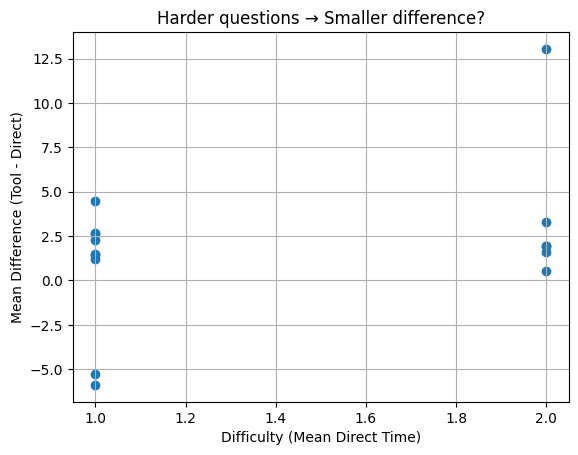

In [283]:
import matplotlib.pyplot as plt

plt.scatter(data['Dificulty'], data['mean_difference'])
plt.xlabel('Difficulty (Mean Direct Time)')
plt.ylabel('Mean Difference (Tool - Direct)')
plt.title('Harder questions → Smaller difference?')
plt.grid(True)
plt.show()

In [284]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr




# Pearson correlation (linear)
r, p = pearsonr(data['Dificulty'], data['mean_difference'])
print(f"Pearson r: {r:.3f}, p-value: {p:.4f}")

# Spearman correlation (monotonic, non-parametric)
rho, p_s = spearmanr(data['Dificulty'], data['mean_difference'])
print(f"Spearman rho: {rho:.3f}, p-value: {p_s:.4f}")

Pearson r: nan, p-value: nan
Spearman rho: nan, p-value: nan


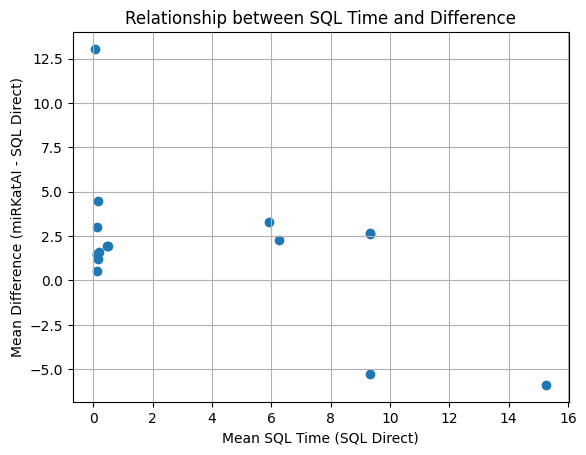

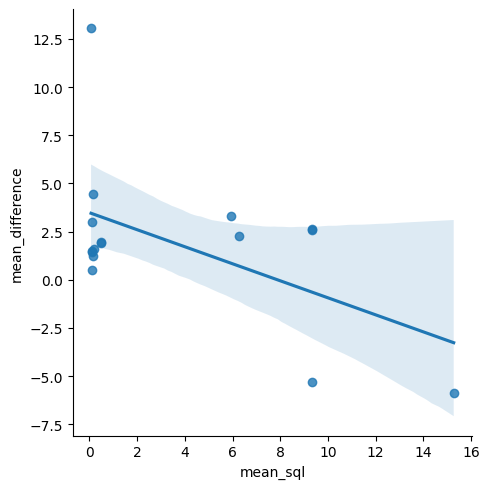

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data structure
import pandas as pd

data['mean_difference'] = data['mean_mirkat'] - data['mean_sql']

# Scatter plot
plt.scatter(data['mean_sql'], data['mean_difference'])
plt.xlabel('Mean SQL Time (SQL Direct)')
plt.ylabel('Mean Difference (miRKatAI - SQL Direct)')
plt.title('Relationship between SQL Time and Difference')
plt.grid(True)
plt.show()

# Optional: regression line
sns.lmplot(x='mean_sql', y='mean_difference', data=data)

In [286]:
from scipy.stats import pearsonr, spearmanr

# Pearson
r, p = pearsonr(data['mean_sql'], data['mean_difference'])
print(f"Pearson r: {r:.3f}, p-value: {p:.4f}")

# Spearman
rho, p_s = spearmanr(data['mean_sql'], data['mean_difference'])
print(f"Spearman rho: {rho:.3f}, p-value: {p_s:.4f}")

Pearson r: -0.532, p-value: 0.0337
Spearman rho: -0.115, p-value: 0.6723


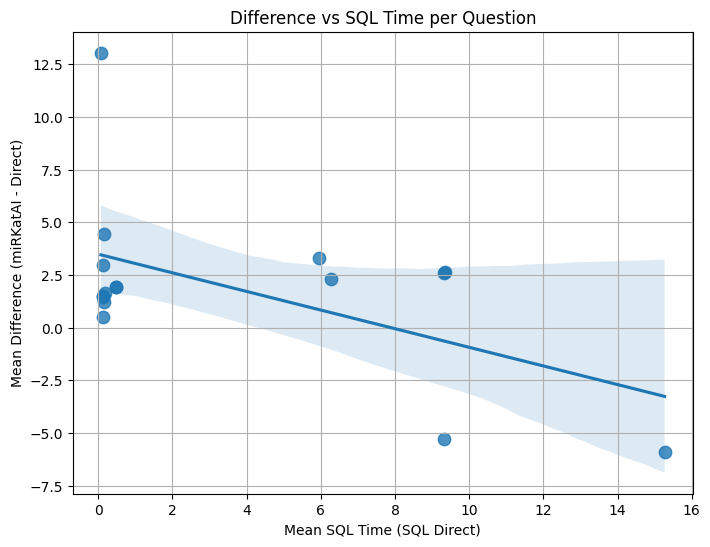

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute difference
data['mean_difference'] = data['mean_mirkat'] - data['mean_sql']

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='mean_sql', y='mean_difference', data=data, ci=95, marker='o', scatter_kws={'s':80})



plt.xlabel('Mean SQL Time (SQL Direct)')
plt.ylabel('Mean Difference (miRKatAI - Direct)')
plt.title('Difference vs SQL Time per Question')
plt.grid(True)
plt.savefig('results/difference_vs_sql_time.svg', bbox_inches='tight')
plt.show()

## Countiung errors
Each answer can be correct, can be wrong, but also, it can have error.
Here we will se the percentage of errors per question and their relative to the time they took

In [421]:
# change order from answer_registry_df to the one in combined_sql_mirkat
answer_registry_df = answer_registry_df.set_index('Question').loc[combined_sql_mirkat['Question']].reset_index()
answer_registry_df

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct,error_count,total_responses,error_rate
0,Which species from the database is marked with...,"[0.640708, 0.641589, 0.751646, 0.641318, 0.638...","[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"[I am sorry, I cannot fulfill this request. Th...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0
1,How many unique mature microRNAs are in the da...,"[1.45966, 1.295917, 1.46018, 1.295198, 1.41435...","[True, True, True, True, True, True, True, Tru...",49155,[There are 49155 unique mature microRNAs in th...,"[10, 7, 6, 7, 16, 12, 12, 7, 12, 10]",1.365492,1.0,10,10,0,10,0.0
2,What is the seed sequence for 'hsa-miR-9-5p'?,"[1.563405, 1.6831450000000001, 1.385196, 1.503...","[True, True, True, True, True, True, True, Tru...",CUUUGGU,[The seed sequence for hsa-miR-9-5p is CUUUGGU...,"[12, 8, 12, 6, 5, 14, 4, 5, 2, 14]",1.554757,1.0,10,10,0,10,0.0
3,How many miRNA target interactions are recorde...,"[1.4618229999999999, 1.866028, 1.667227, 1.780...","[True, True, True, True, True, True, True, Tru...",1492,[There are 1492 miRNA target interactions reco...,"[11, 2, 5, 9, 3, 3, 7, 13, 3, 2]",1.628819,1.0,10,10,0,10,0.0
4,How many unique seed sequences are associated ...,"[1.7414260000000001, 1.8822100000000002, 1.975...","[True, True, True, True, True, True, True, Tru...",2027,[There are 2027 unique seed sequences associat...,"[1, 3, 2, 12, 6, 2, 5, 9, 16, 3]",1.799421,1.0,10,10,0,10,0.0
5,How many mirnas that target STUM ( including i...,"[2.244834, 2.606364, 2.607021, 2.182806, 2.386...","[True, True, True, True, True, True, True, Tru...",4,[There are 2 microRNAs that target STIM1 (incl...,"[2, 1, 1, 8, 2, 11, 1, 4, 15, 5]",2.392997,1.0,10,10,0,10,0.0
6,How many mirnas that target FEZ2 ( including i...,"[2.2772040000000002, 2.485072, 2.423341, 2.381...","[True, True, True, True, True, True, True, Tru...",2,[There are 2 miRNAs that target FEZ2 (includin...,"[4, 10, 8, 10, 15, 4, 8, 14, 4, 12]",2.427448,1.0,10,10,0,10,0.0
7,How many unique miRNAs target the gene 'STUM' ...,"[11.95583, 0.636971, 12.010009, 0.671545, 11.8...","[False, False, False, False, False, False, Fal...",278,[There are 94 unique miRNAs that target the ge...,"[14, 12, 9, 4, 4, 9, 15, 6, 13, 4]",4.031571,0.0,10,0,7,10,0.7
8,What is the probability for the predicted inte...,"[4.645237, 4.539009, 4.811624, 4.753745, 4.648...","[True, True, True, True, True, True, True, Tru...",0,[The query returned multiple probabilities. It...,"[5, 15, 7, 1, 10, 6, 16, 3, 8, 6]",4.612468,1.0,10,10,0,10,0.0
9,How many interactions are experimentally valid...,"[8.768811, 8.631849, 8.396795000000001, 8.6269...","[True, True, True, True, True, True, True, Tru...",7694,[There are 7694 interactions from miRTarBase.\...,"[3, 11, 13, 15, 12, 8, 11, 2, 7, 8]",8.550898,1.0,10,10,0,10,0.0


In [422]:
import pandas as pd

# Define the error keywords
error_keywords = ["error", "i am sorry", "apologies", "cannot"]

def count_errors(answers):
    count = 0
    for ans in answers:
        if any(kw.lower() in ans.lower() for kw in error_keywords):
            count += 1
    return count

# Create new columns
answer_registry_df['error_count'] = answer_registry_df['Answers'].apply(count_errors)
answer_registry_df['total_responses'] = answer_registry_df['Answers'].apply(len)
answer_registry_df['error_rate'] = answer_registry_df['error_count'] / answer_registry_df['total_responses']


In [423]:
import pandas as pd

# Define keywords for hard errors
error_keywords = ["error", "i am sorry", "apologies", "cannot"]

def classify_answer(ans: str, correct_answer) -> str:
    ans_lower = ans.lower()
    correct_answer_str = str(correct_answer).lower()
    if any(kw in ans_lower for kw in error_keywords):
        return "Error"
    elif correct_answer_str in ans_lower:
        return "Success"
    else:
        return "Mistake"

# Explode lists so each row = one response
df_exploded = answer_registry_df.copy()
df_exploded = df_exploded.explode(['Answers', 'Response Time']).reset_index(drop=True)

# Add numeric index for question ID
df_exploded['Question Index'] = df_exploded.index // 10 + 1  # adjust if not exactly 10 per question

# Classify each answer
df_exploded['Outcome'] = df_exploded.apply(lambda row: classify_answer(row['Answers'], row['Expected']), axis=1)

# Convert Response Time to numeric
df_exploded['Response Time'] = pd.to_numeric(df_exploded['Response Time'])
df_exploded['Outcome'].unique()

array(['Error', 'Success', 'Mistake'], dtype=object)

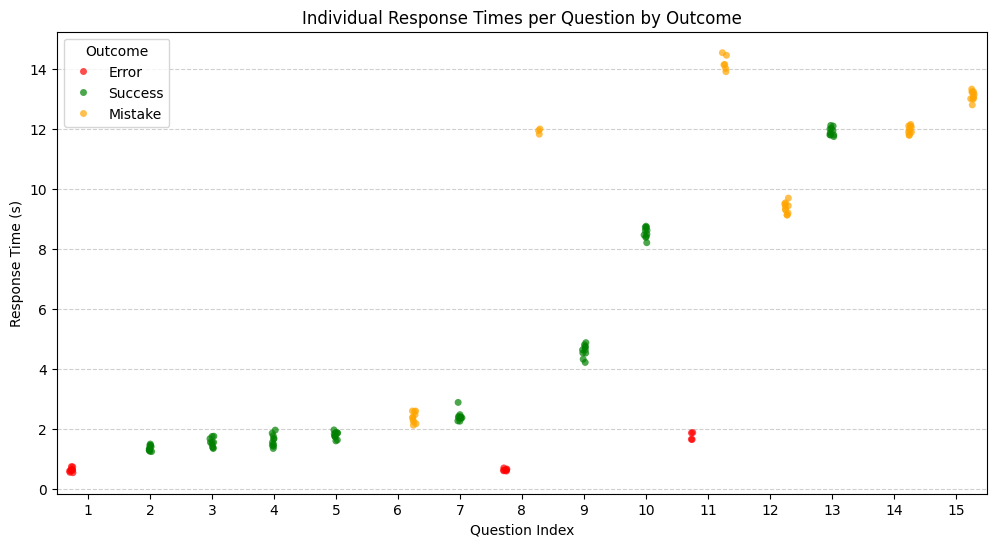

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# sucess = green, mistake = orange, error = red
palette = {'Success': 'green', 'Mistake': 'orange', 'Error': 'red'}
sns.stripplot(
    data=df_exploded,
    x='Question Index',
    y='Response Time',
    hue='Outcome',
    dodge=True,
    alpha=0.7,
    jitter=True,
    palette=palette
)
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Individual Response Times per Question by Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Outcome')
plt.show()


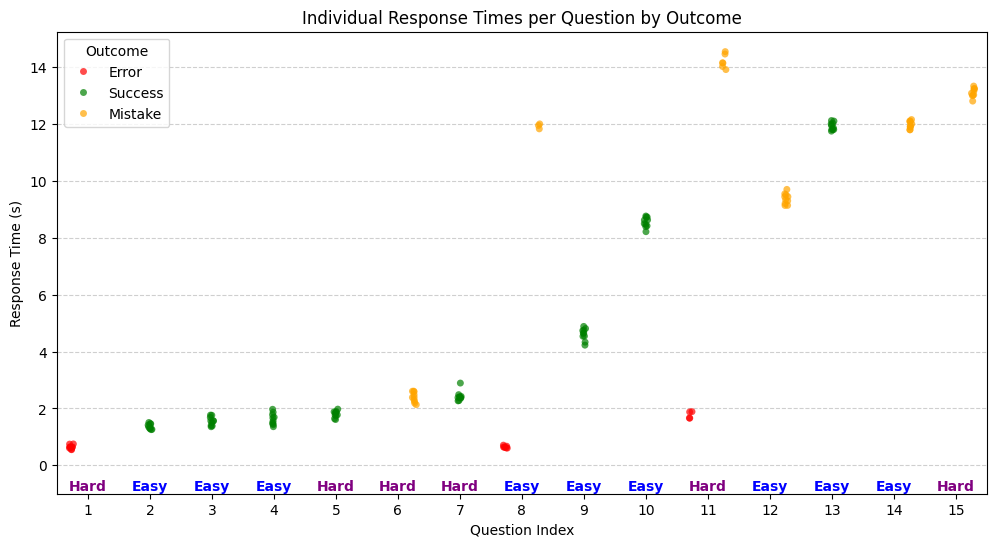

In [433]:
# the same strip plot but with the difficulty level as a label below each question
import seaborn as sns
import matplotlib.pyplot as plt
# Merge difficulty into exploded df, avoiding duplicate columns
difficulty_df_clean = difficulty_df[['Dificulty']].copy()
if 'Dificulty' in df_exploded.columns:
    df_exploded = df_exploded.drop(columns=['Dificulty'])
df_exploded = df_exploded.merge(difficulty_df_clean, left_on='Question', right_index=True, how='left')
df_exploded['Difficulty'] = df_exploded['Dificulty'].map({1: 'Easy', 2: 'Hard', 3: 'Very Hard', 4: 'Very Hard'})
plt.figure(figsize=(12,6))
# sucess = green, mistake = orange, error = red
palette = {'Success': 'green', 'Mistake': 'orange', 'Error': 'red'}
sns.stripplot(
    data=df_exploded,
    x='Question Index',
    y='Response Time',
    hue='Outcome',
    dodge=True,
    alpha=0.7,
    jitter=True,
    palette=palette
)


# Add difficulty labels below x-axis
question_difficulty = df_exploded.groupby('Question Index')['Difficulty'].first()
# Hard red, easy green palette
difficulty_colors = {'Easy': 'blue', 'Hard': 'purple', 'Very Hard': 'black', None: 'gray'}
for i, (q_idx, diff) in enumerate(question_difficulty.items()):
    if pd.isna(diff):
        print(f"The question index {q_idx}, correponding to question {df_exploded.loc[df_exploded['Question Index'] == q_idx, 'Question'].values[0]} has no difficulty level assigned.")
        diff = 'Easy'
    plt.text(i, -0.5, diff, ha='center', va='top', color=difficulty_colors[diff], fontweight='bold')
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Individual Response Times per Question by Outcome')
plt.ylim(bottom=-1)  # make space for difficulty labels
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Outcome')
plt.savefig('results/individual_response_times.svg', bbox_inches='tight')
plt.show()

In [434]:
df_exploded

,Question,Response Time,Correct,Expected,Answers,Question_n,mean_response_time,percentage_correct,total_answers,total_correct,error_count,total_responses,error_rate,Question Index,Outcome,Difficulty,Dificulty
0,Which species from the database is marked with...,0.640708,"[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"I am sorry, I cannot fulfill this request. The...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0,1,Error,Hard,2
1,Which species from the database is marked with...,0.641589,"[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"I am sorry, I cannot fulfill this request. The...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0,1,Error,Hard,2
2,Which species from the database is marked with...,0.751646,"[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"I am sorry, I cannot fulfill this request. The...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0,1,Error,Hard,2
3,Which species from the database is marked with...,0.641318,"[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"I am sorry, I cannot fulfill this request. The...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0,1,Error,Hard,2
4,Which species from the database is marked with...,0.638309,"[False, False, False, False, False, False, Fal...",Merkel cell polyomavirus,"I am sorry, I cannot fulfill this request. The...","[8, 4, 4, 11, 9, 15, 2, 16, 5, 16]",0.641848,0.0,10,0,10,10,1.0,1,Error,Hard,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,What is the minimum interaction score recorded...,12.812269,"[True, True, True, True, True, True, True, Tru...",50,The minimum probability recorded for any miRNA...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10,0,10,0.0,15,Mistake,Hard,2
146,What is the minimum interaction score recorded...,13.087329,"[True, True, True, True, True, True, True, Tru...",50,The minimum probability recorded for any miRNA...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10,0,10,0.0,15,Mistake,Hard,2
147,What is the minimum interaction score recorded...,13.244412,"[True, True, True, True, True, True, True, Tru...",50,The minimum probability recorded for any miRNA...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10,0,10,0.0,15,Mistake,Hard,2
148,What is the minimum interaction score recorded...,13.252587,"[True, True, True, True, True, True, True, Tru...",50,The minimum probability recorded for any miRNA...,"[15, 6, 3, 13, 13, 10, 9, 11, 1, 15]",13.119645,1.0,10,10,0,10,0.0,15,Mistake,Hard,2


In [426]:
from scipy.stats import f_oneway

groups = [g['Response Time'].values for _, g in df_exploded.groupby('Outcome')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F={f_stat:.3f}, p={p_val:.4f}")

ANOVA: F=59.488, p=0.0000


In [427]:
from scipy.stats import ttest_ind

# Extract groups
success_times = df_exploded.loc[df_exploded['Outcome'] == 'Success', 'Response Time']
mistake_times = df_exploded.loc[df_exploded['Outcome'] == 'Mistake', 'Response Time']
error_times = df_exploded.loc[df_exploded['Outcome'] == 'Error', 'Response Time']

# Pairwise comparisons
pairs = {
    ('Success', 'Mistake'): ttest_ind(success_times, mistake_times, equal_var=False),
    ('Success', 'Error'): ttest_ind(success_times, error_times, equal_var=False),
    ('Mistake', 'Error'): ttest_ind(mistake_times, error_times, equal_var=False)
}

# Bonferroni correction (3 comparisons)
alpha = 0.05 / 3

for (g1, g2), result in pairs.items():
    print(f"{g1} vs {g2}: t = {result.statistic:.3f}, p = {result.pvalue:.5f} (adjusted alpha = {alpha:.3f})")


Success vs Mistake: t = -7.918, p = 0.00000 (adjusted alpha = 0.017)
Success vs Error: t = 7.882, p = 0.00000 (adjusted alpha = 0.017)
Mistake vs Error: t = 15.098, p = 0.00000 (adjusted alpha = 0.017)


In [428]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = (((nx - 1)*x.std(ddof=1)**2 + (ny - 1)*y.std(ddof=1)**2) / (nx + ny - 2))**0.5
    return (x.mean() - y.mean()) / pooled_std
for (g1, g2) in pairs.keys():
    x = df_exploded.loc[df_exploded['Outcome'] == g1, 'Response Time']
    y = df_exploded.loc[df_exploded['Outcome'] == g2, 'Response Time']
    d = cohens_d(x, y)
    print(f"{g1} vs {g2}: Cohen's d = {d:.2f}")



Success vs Mistake: Cohen's d = -1.48
Success vs Error: Cohen's d = 1.01
Mistake vs Error: Cohen's d = 2.60


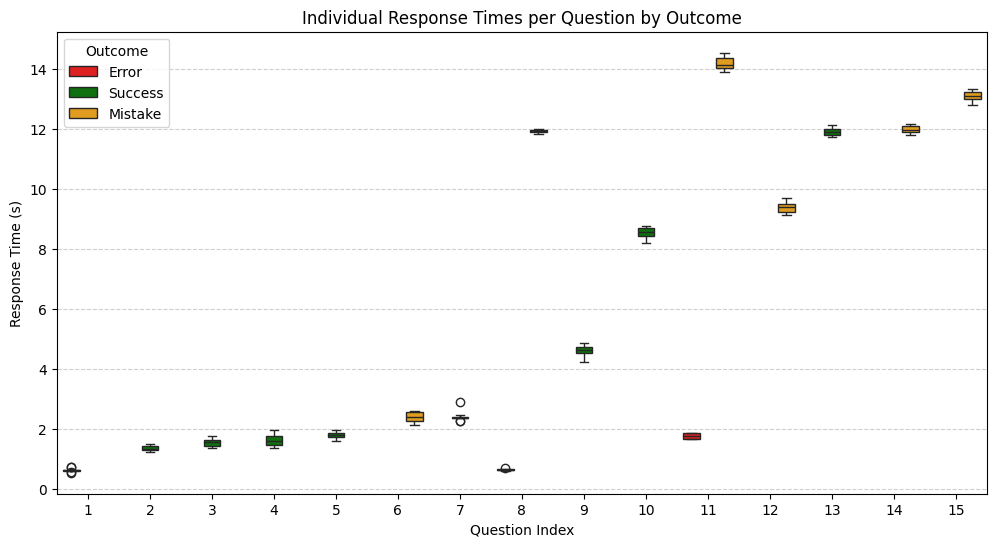

In [429]:
# the same plot but with boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_exploded,
    x='Question Index',
    y='Response Time',
    hue='Outcome',
    palette=palette
)
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Individual Response Times per Question by Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Outcome')
plt.show()


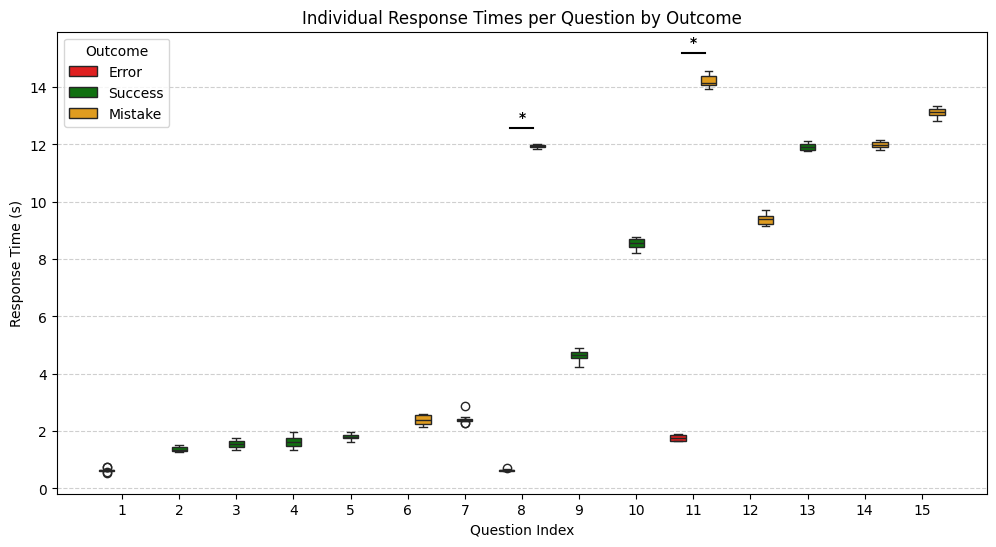

In [430]:
# The same boxplot but marking the statistically significant differences between outcomes of the questions if there are any
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_exploded,
    x='Question Index',
    y='Response Time',
    hue='Outcome',
    palette=palette
)
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Individual Response Times per Question by Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.legend(title='Outcome')
# Add significance markers
for i, q_idx in enumerate(sorted(df_exploded['Question Index'].unique())):
    subset = df_exploded[df_exploded['Question Index'] == q_idx]
    outcomes = subset['Outcome'].unique()
    if len(outcomes) < 2:
        continue
    pairs = [(outcomes[j], outcomes[k]) for j in range(len(outcomes)) for k in range(j+1, len(outcomes))]
    y_max = subset['Response Time'].max()
    y_min = subset['Response Time'].min()
    y_range = y_max - y_min
    for j, (g1, g2) in enumerate(pairs):
        times1 = subset[subset['Outcome'] == g1]['Response Time']
        times2 = subset[subset['Outcome'] == g2]['Response Time']
        if len(times1) < 2 or len(times2) < 2:
            continue
        t_stat, p_val = ttest_ind(times1, times2, equal_var=False)
        alpha = 0.05 / len(pairs)
        if p_val < alpha:
            y = y_max + (j+1)*0.05*y_range
            plt.plot([i-0.2, i+0.2], [y, y], color='black')
            plt.text(i, y + 0.01*y_range, '*', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

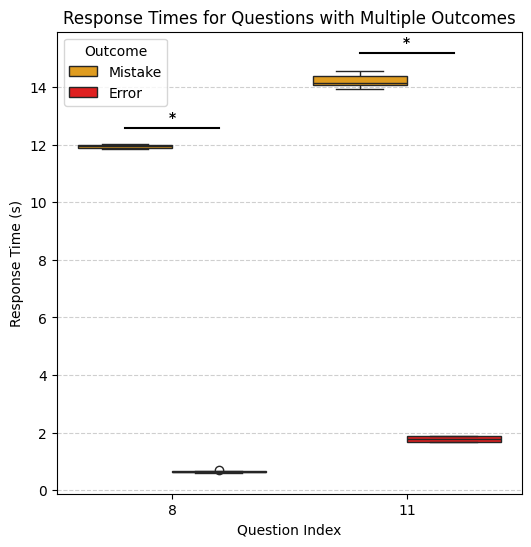

In [431]:
# the same boxplot but only for the questions where there is at least two different outcomes
questions_with_multiple_outcomes = df_exploded.groupby('Question Index')['Outcome'].nunique()
questions_to_plot = questions_with_multiple_outcomes[questions_with_multiple_outcomes > 1].index
plt.figure(figsize=(6,6))
sns.boxplot(
    data=df_exploded[df_exploded['Question Index'].isin(questions_to_plot)],
    x='Question Index',
    y='Response Time',
    hue='Outcome',
    palette=palette
)
plt.xlabel('Question Index')
plt.ylabel('Response Time (s)')
plt.title('Response Times for Questions with Multiple Outcomes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.legend(title='Outcome')
# Add significance markers
for i, q_idx in enumerate(sorted(questions_to_plot)):
    subset = df_exploded[df_exploded['Question Index'] == q_idx]
    outcomes = subset['Outcome'].unique()
    if len(outcomes) < 2:
        continue
    pairs = [(outcomes[j], outcomes[k]) for j in range(len(outcomes)) for k in range(j+1, len(outcomes))]
    y_max = subset['Response Time'].max()
    y_min = subset['Response Time'].min()
    y_range = y_max - y_min
    for j, (g1, g2) in enumerate(pairs):
        times1 = subset[subset['Outcome'] == g1]['Response Time']
        times2 = subset[subset['Outcome'] == g2]['Response Time']
        if len(times1) < 2 or len(times2) < 2:
            continue
        t_stat, p_val = ttest_ind(times1, times2, equal_var=False)
        alpha = 0.05 / len(pairs)
        if p_val < alpha:
            y = y_max + (j+1)*0.05*y_range
            plt.plot([i-0.2, i+0.2], [y, y], color='black')
            plt.text(i, y + 0.01*y_range, '*', ha='center', va='bottom', color='black', fontweight='bold')
plt.savefig('results/response_times_multiple_outcomes.svg', bbox_inches='tight')
plt.show()

In [432]:
df_exploded.groupby('Outcome')['Response Time'].agg(['mean', 'std', 'count'])


,mean,std,count
Outcome,,,
Error,0.857929,0.459062,21
Mistake,9.996730,4.178616,49
Success,4.233569,3.724135,80


In [444]:
80+49+21

150